In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

import math
from random import normalvariate


### Задача 1.

В револьвере вставлены два патрона подряд. Первый участник русской рулетки после выстрела остался жив. Что следует сделать второму участнику: случайно прокрутить барабан перед выстрелом или выстрелить сразу?

В рамках решения этой задачи мы будем сравнивать 2 вероятности:
- остаться в живых, если произвольно покрутил барабан
- остаться в живых, если выстрелил сразу после первого участника

Рассчитаем первую.  
После выстрела в барабане с шестью ячейками все еще два патрона. Второй участник произвольно крутит барабан. Какова вероятность, что он останется в живых после выстрела? Рассчитайте вероятность, обозначьте ее p_1 и выведите значение этой переменной на экран.

In [186]:
p_1 = 4/6
print(f'{round(p_1, 2) * 100} %')

67.0 %


Чтобы рассчитать вероятность второго события, сформируем множество всех элементарных исходов, обозначая 0 ячейки без путь и X ячейки с пулями:

- X 0 0 0 0 X
- 0 0 0 0 X X
- 0 0 0 X X 0
- 0 0 X X 0 0
- 0 X X 0 0 0
- X X 0 0 0 0

Два из этих исходов невозможны с учетом, что один игрок уже выстрелил и остался в живых. Посчитайте количество оставшихся исходов, а также количество таких, при которых второй игрок выжевет. Рассчитайте итоговую вероятность выжить для второго игрока, если он не будет крутить барабан после первого, запишите ее в переменную p_2 и выведите ее значение на экран.

In [187]:
p_2 = 1 - 1/4
print(f'{round(p_2, 2) * 100} %')

75.0 %


Сравните полученные вероятности и скажите, что лучше сделать второму игроку, чтобы выжить.

In [188]:
print(f'Вероятность выжить у игрока , который не будет крутить барабан, после первого холостого выстрела - БОЛЬШЕ')

Вероятность выжить у игрока , который не будет крутить барабан, после первого холостого выстрела - БОЛЬШЕ


### Задача 2. 

Вася пришел на автобусную остановку, чтобы поехать в гости к бабушке в деревню. Он знает, что вероятность того, что автобус приедет за 30 минут, составляет 95%. Но он решил столько не ждать, а вызвать такси, если автобус не приедет в течение пятнадцати минут. Какова вероятность, что Вася не поедет к бабушке на такси?

Сначала давайте ответим на вопрос: какова вероятность того, что автобус НЕ приедет в течение 30 минут? Это событие является противоположным к событию "автобус приедет в течение 30 минут". Посчитайте эту вероятность и запишите в переменную p_1, а затем выведите ее значение на экран.

In [189]:
p_1 = 1 - 0.95
print(f'{round(p_1, 2) * 100} %')

5.0 %


Теперь давайте порассуждаем. Чтобы случилось событие "автобус не приедет в течение тридати минут", должно произойти два события:
- автобус не приезжает первые 15 минут
- автобус не приезжает вторые 15 минут

Все эти события независимы, то есть вероятность того, что случатся они все, равна произведению их вероятностей. Также их все можно переформулировать в "автобус не приедет в течение 15 минут". Обозначьте эту вероятность p_2, рассчитайте и выведите на экран.

In [190]:
p_2 = math.sqrt(0.05)
print(f'{round(p_2, 2) * 100} %')

22.0 %


Мы знаем вероятность того, что автобус не приедет в течение 15 минут. Но нам нужна вероятность того, что Вася все таки поедет к бабушке на автобусе. Рассчитайте ее, запишите в переменную p_3 и выведите ее значение на экран.

In [191]:
p_3 = 1 - p_2
print(f'{round(p_3, 2) * 100} %')

78.0 %


### Задача 3.

С помощью [данных](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset) о весе людей в возрасте 18 лет ответьте на два вопроса:
- у какой доли людей в этом возрасте вес не превышает 50кг?
- какого веса не имеет 70 процентов людей?

In [192]:
df = pd.read_csv('../datasets/SOCR-HeightWeight.csv')

df['Height(Inches)'] = round(df['Height(Inches)'], 2)
df['Weight(kg)'] = round(df['Weight(Pounds)'] * 0.4536, 2)

del df['Weight(Pounds)']

<Axes: >

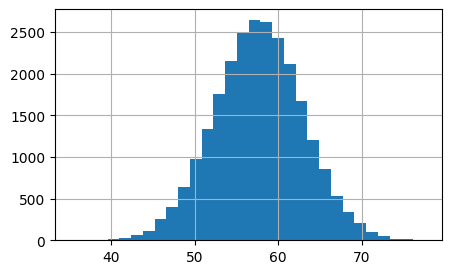

In [193]:
plt.figure(figsize=(5, 3))

df['Weight(kg)'].hist(bins=30)

<Axes: >

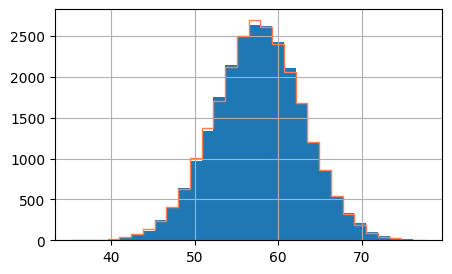

In [194]:
weight_exp = [normalvariate(df['Weight(kg)'].mean(), df['Weight(kg)'].std()) for _ in range(len(df))]
weight_exp = pd.Series(weight_exp)

weight_range = [df['Weight(kg)'].min(), df['Weight(kg)'].max()]

plt.figure(figsize=(5, 3))
df['Weight(kg)'].hist(bins=30, range=weight_range)
weight_exp.hist(bins=30, histtype='step', color='coral', range=weight_range)

Вероятность того, что вес не превышает 50кг?

In [202]:
weight_distr = st.norm(weight_exp.mean(), weight_exp.std())
result = weight_distr.cdf(50)

print(f'Доля легковесов: {round(result * 100, 2)} %')

Доля легковесов: 7.53 %


Какого веса не имеет 70% людей?

In [208]:
weight_distr.ppf(0.7)

60.39878527811221